# OGGM centerlines versus elevation-band flowlines: a quick comparison 

As of version 1.4, OGGM introduced a new way to compute flowlines: the so-called "elevation-band flowlines" (after [Huss & Farinotti, 2012](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2012JF002523)). This notebook allows you to compare the two methods based on the available glacier directories.

In [1]:
from oggm import cfg, utils, workflow, tasks, graphics
from oggm.core import flowline
import salem
import xarray as xr
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
cfg.initialize(logging_level='WARNING')

2021-02-03 14:52:44: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2021-02-03 14:52:44: oggm.cfg: Multiprocessing switched ON according to the parameter file.
2021-02-03 14:52:44: oggm.cfg: Multiprocessing: using all available processors (N=8)


In [3]:
# Pick the glacier you want! We try Hintereisferner
rgi_ids = ['RGI60-11.00897']

## Get ready

In order to open the same glacier on two different glacier directories, we trick: we set a new working directory for each case! 

In [4]:
# Where to store the data 
cfg.PATHS['working_dir'] = utils.gettempdir(dirname='OGGM-centerlines', reset=True)

# We start from prepro level 3 with all data ready
base_url = 'https://cluster.klima.uni-bremen.de/~oggm/gdirs/oggm_v1.4/L3-L5_files/CRU/centerlines/qc3/pcp2.5/no_match/'
gdirs = workflow.init_glacier_directories(rgi_ids, from_prepro_level=3, prepro_border=40, prepro_base_url=base_url)
gdir_cl = gdirs[0]
gdir_cl

2021-02-03 14:52:48: oggm.workflow: init_glacier_directories from prepro level 3 on 1 glaciers.
2021-02-03 14:52:48: oggm.workflow: Execute entity task gdir_from_prepro on 1 glaciers


<oggm.GlacierDirectory>
  RGI id: RGI60-11.00897
  Region: 11: Central Europe
  Subregion: 11-01: Alps                            
  Name: Hintereisferner
  Glacier type: Glacier
  Terminus type: Land-terminating
  Area: 8.036 km2
  Lon, Lat: (10.7584, 46.8003)
  Grid (nx, ny): (199, 154)
  Grid (dx, dy): (50.0, -50.0)

In [5]:
cfg.PATHS['working_dir'] = utils.gettempdir(dirname='OGGM-elevbands', reset=True)
base_url = 'https://cluster.klima.uni-bremen.de/~oggm/gdirs/oggm_v1.4/L3-L5_files/CRU/elev_bands/qc3/pcp2.5/no_match/'
gdirs = workflow.init_glacier_directories(rgi_ids, from_prepro_level=3, prepro_border=40, prepro_base_url=base_url)
gdir_eb = gdirs[0]
gdir_eb

2021-02-03 14:52:48: oggm.workflow: init_glacier_directories from prepro level 3 on 1 glaciers.
2021-02-03 14:52:48: oggm.workflow: Execute entity task gdir_from_prepro on 1 glaciers


<oggm.GlacierDirectory>
  RGI id: RGI60-11.00897
  Region: 11: Central Europe
  Subregion: 11-01: Alps                            
  Name: Hintereisferner
  Glacier type: Glacier
  Terminus type: Land-terminating
  Area: 8.036 km2
  Lon, Lat: (10.7584, 46.8003)
  Grid (nx, ny): (199, 154)
  Grid (dx, dy): (50.0, -50.0)

##  Glacier length and cross section

In [6]:
fls_cl = gdir_cl.read_pickle('model_flowlines')
fls_eb = gdir_eb.read_pickle('model_flowlines')

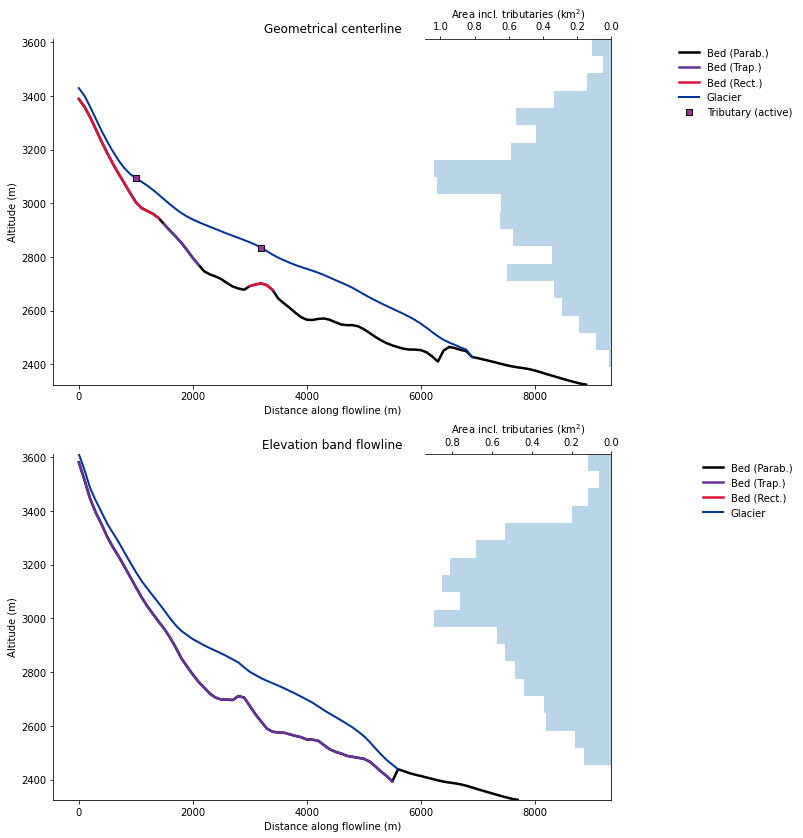

In [7]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 14), sharex=True, sharey=True)
graphics.plot_modeloutput_section(fls_cl, ax=ax1)
ax1.set_title('Geometrical centerline')
graphics.plot_modeloutput_section(fls_eb, ax=ax2)
ax2.set_title('Elevation band flowline');

## What's next?

- return to the [OGGM documentation](https://docs.oggm.org)
- back to the [table of contents](welcome.ipynb)